In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False
np.set_printoptions(precision = 4, suppress = True)

# 积分和微分方程求解
## 数值积分-quad

Text(4, 0.6, '$\\int_0^{\\infty}e^{-x^{1/2}}dx = $2.0')

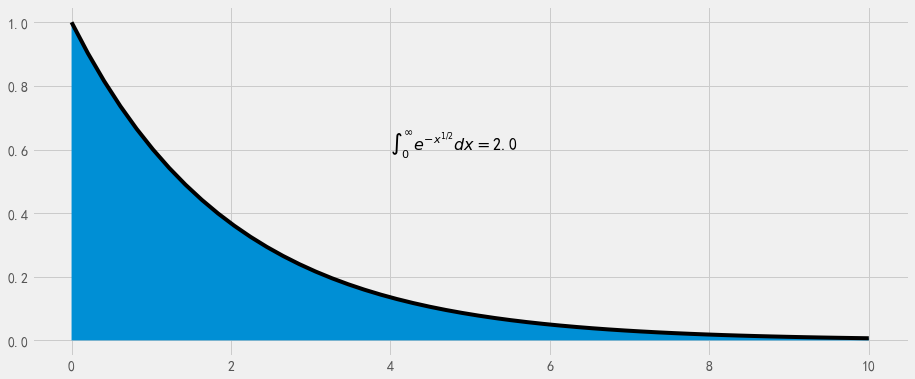

In [7]:
from scipy.integrate import quad
interval = [0., np.inf]

def g(x):
    return np.exp(-x ** 1/2)
value, max_err = quad(g, *interval)

x = np.linspace(0, 10, 50)
plt.figure(figsize = (14, 6))
plt.plot(x, g(x), 'k-')
plt.fill_between(x, g(x))
plt.annotate(r'$\int_0^{\infty}e^{-x^{1/2}}dx = $'+ '{}'.format(value), (4, 0.6), fontsize = 16)

## 常微分方程求解

In [11]:
def f(y, x):
    return np.sin(x)

from scipy.integrate import odeint

x = np.linspace(0, 2 * np.pi, 100)
result = odeint(f, 0, x)
result[: 10]

array([[0.    ],
       [0.002 ],
       [0.008 ],
       [0.0181],
       [0.0321],
       [0.0499],
       [0.0716],
       [0.0971],
       [0.1262],
       [0.1587]])

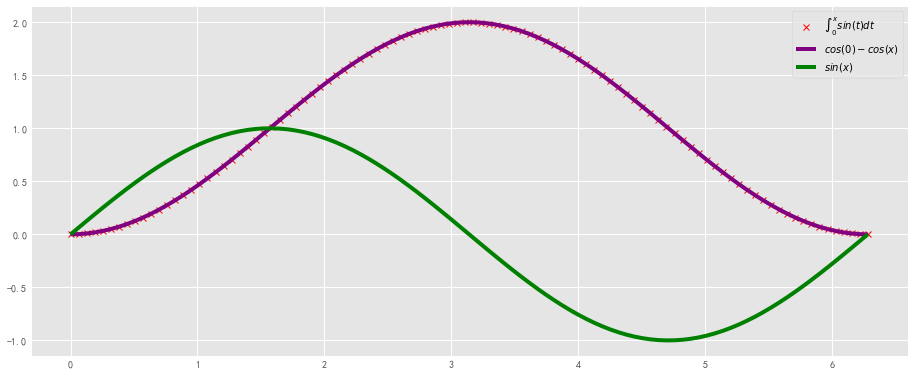

In [15]:
plt.figure(figsize = (14, 6))
plt.plot(x, result, 'rx', label = r'$\int_{0}^{x}sin(t) dt $')
plt.plot(x, -np.cos(x) + np.cos(0), color = 'purple', label = r'$cos(0) - cos(x)$')
plt.plot(x, f(0, x), 'g-', label = r'$sin(x)$')
plt.legend(loc = 'upper right')

# 最优化求解
## 曲线拟合

Text(4, 20, '$y = ae^{-bsin(fx + \\phi)}$')

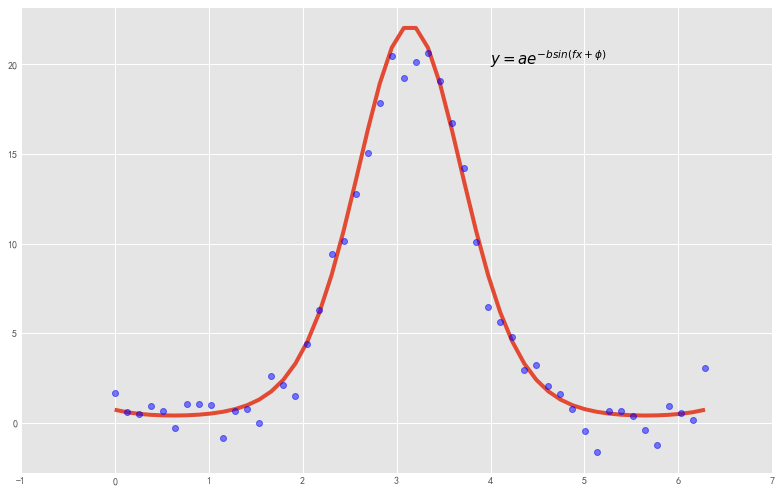

In [17]:
from scipy.stats import norm

def function(x, a, b, f, phi):
    return a * np.exp(-b * np.sin(f * x + phi))

plt.figure(figsize = (12, 8))
x = np.linspace(0, 2 * np.pi, 50)
actual_parameters = [3, 2, 1.25, np.pi / 4]
y = function(x, *actual_parameters)
y_noisy = y + norm.rvs(size = len(x))
plt.plot(x, y)
plt.plot(x, y_noisy, 'bo', alpha =0.5)
plt.xlim(-1, 7)
plt.annotate(r'$y = ae^{-bsin(fx + \phi)}$', (4, 20), fontsize = 15)

In [20]:
from scipy.optimize import leastsq

def f_err(p, y, x):
    return y - function(x, *p)

coef, is_success = leastsq(f_err, [1, 1, 1, 1], args = (y_noisy, x))

coef, is_success

(array([3.2357, 1.8795, 1.2935, 0.6348]), 1)

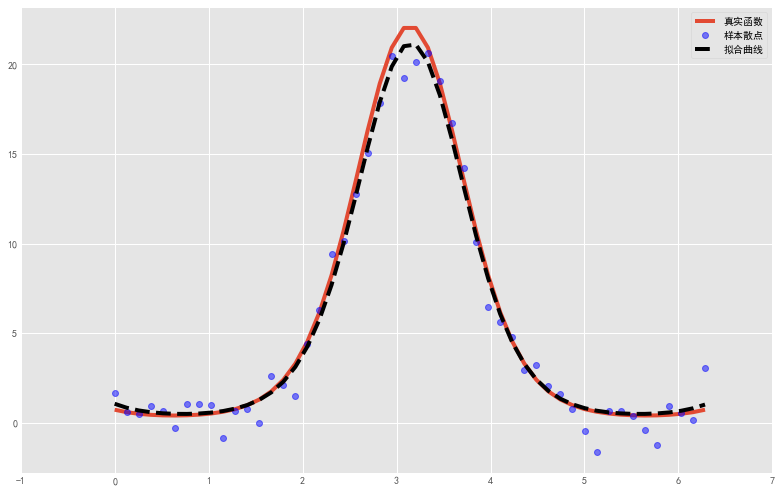

In [23]:
plt.figure(figsize = (12, 8))
plt.plot(x, y, label = '真实函数')
plt.plot(x, y_noisy, 'bo', alpha = 0.5, label = '样本散点')
plt.plot(x, function(x, *coef), 'k--', label = '拟合曲线')
plt.xlim(-1, 7)
plt.legend(loc = 'best')

## 资产组合的有效边界求解

In [24]:
r = np.array([-0.15, 0.12, 0.31, 0.04])
cov_mat = np.array([[0.1948, 0.1247, 0.0868, 0.1127],
                   [0.1247, 0.2063, 0.1095, 0.1176],
                   [0.0868, 0.1095, 0.2983, 0.1015],
                   [0.1127, 0.1176, 0.1015, 0.1449]])
k = len(r)

In [26]:
port_r, port_var = [], []
for p in range(4000):
    weights = np.random.random(k)
    weights /= np.sum(weights)
    port_r.append(np.sum(r * weights))
    port_var.append(np.sqrt((weights.T).dot(cov_mat).dot(weights)))
port_r, port_var = np.array(port_r), np.array(port_var)

import scipy.optimize as sco

def statistics(weights):
    weights = np.array(weights)
    port_returns = np.sum(r * weights)
    port_variance = np.sqrt((weights.T).dot(cov_mat).dot(weights))
    return np.array([port_returns, port_variance, port_returns / port_variance])

def min_variance(weights):
    return statistics(weights)[1]

target_returns = np.linspace(0.0, 0.31, 70)
target_variance = []
for tar in target_returns:
    bnds = tuple((0, 1) for x in range(k))
    cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tar}, {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    res = sco.minimize(min_variance, k * [1 / k], method = 'SLSQP', bounds = bnds, constraints = cons)
    target_variance.append(res['fun'])
    
target_variance = np.array(target_variance)

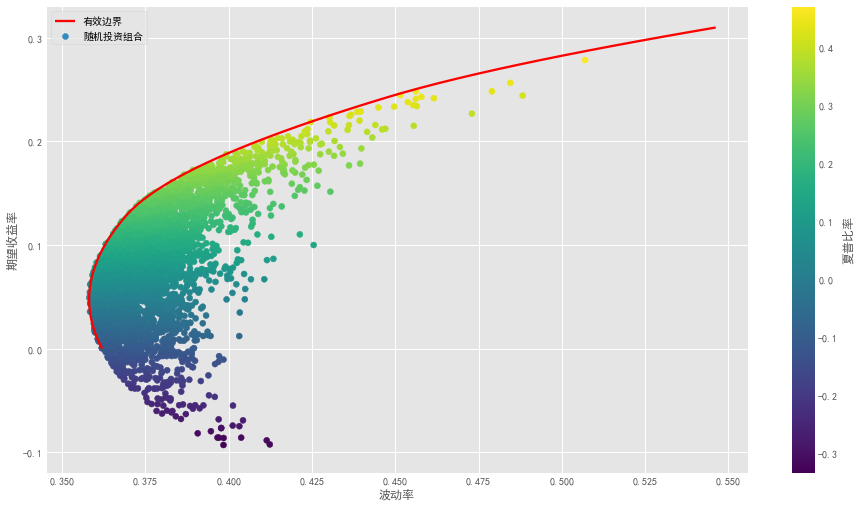

In [28]:
risk_free = 0.04
plt.figure(figsize = (14, 8))
plt.scatter(port_var, port_r, c = (port_r - risk_free) / port_var, marker = 'o', label = '随机投资组合')
plt.plot(target_variance, target_returns, c = 'red', linewidth = 2.3, label = '有效边界')
plt.xlabel('波动率')
plt.ylabel('期望收益率')
plt.legend(loc = 'best')
plt.colorbar(label = '夏普比率')

# 概率统计
## 描述性统计

In [30]:
import scipy.stats as stats

x_sample = np.random.randint(0, 100, 20)
x_sample

array([22, 46,  0, 63, 91, 49, 76, 56, 84, 55, 90, 42, 63,  4, 18, 33, 91,
       25, 48, 87])

In [32]:
print('样本均值', x_sample.mean())
print('样本中位数', np.median(x_sample))
print('样本最小值', x_sample.min())
print('样本最大值', x_sample.max())
print('样本众数', stats.stats.mode(x_sample))
print('样本标准差', x_sample.std())
print('样本总和', x_sample.sum())
print('样本二阶矩', stats.stats.moment(x_sample, 2))
print('样本偏度', stats.stats.skew(x_sample))
print('样本峰度', stats.stats.kurtosis(x_sample))

样本均值 52.15
样本中位数 52.0
样本最小值 0
样本最大值 91
样本众数 ModeResult(mode=array([63]), count=array([2]))
样本标准差 28.18913797901596
样本总和 1043
样本二阶矩 794.6274999999999
样本偏度 -0.19369473420131056
样本峰度 -1.0114832655970996


## 连续概率分布
- cdf是累积分布函数
- pdf是概率密度函数
- rvs 指定随机参数的变量
- fit 对于某个样本拟合该分布，对各个参数的MLE值
### 正态分布

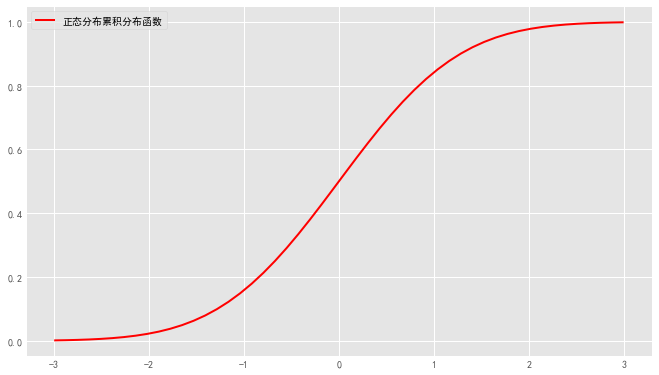

In [33]:
from scipy.stats import norm

plt.figure(figsize = (10, 6))
x = np.linspace(-3, 3, 50)
plt.plot(x, norm.cdf(x, 0, 1), 'r-', linewidth = 2, label = '正态分布累积分布函数')
plt.legend(loc = 'best')

In [34]:
x_norm = norm.rvs(0, 4, 100)
print('均值0标准差4的正态随机数100个\n', x_norm)

均值0标准差4的正态随机数100个
 [ 1.2829  8.2584  7.7883  6.1305 -2.4452  0.9335  1.2598 -0.0556  9.064
  1.5175 -1.5583 -1.8589 -0.8998  2.4117  5.3156  4.4287 -4.7362  5.3842
  0.714  -5.5807  4.837  -4.2635 -3.6972  1.979  -1.5938 -0.1365 -1.3155
 -2.6678  2.6179 -1.0324 -4.2182 -3.8693 -7.0447 -3.7337 -2.0347 -5.6837
  2.177  -6.66    1.4279 -1.7791  2.5192 -1.1714 -4.7626  3.052  -2.2728
 -9.9365  6.2048  4.3744  4.4936 -0.945  -1.1094 -2.3526 -3.1372 -3.7483
 -1.6316 -7.7114  2.9661 -8.5008  2.2086  1.716   1.8696  7.3987  2.9747
  3.0792  1.8399  0.3913 -0.2434  1.5214 -3.2614 -0.6207  3.9371  6.818
 -6.6054 -4.2226 -4.5142 -0.0094 -2.9348  4.3823  1.4418 -1.999   3.8598
 -4.9478  0.9079  1.4181 -4.3585  0.0782  0.8278  0.9125 -1.4023 -1.683
 -5.9333  1.7496 -1.8666 -0.3623  5.6423  9.9772  5.6392 -1.8766  4.1199
  1.4984]


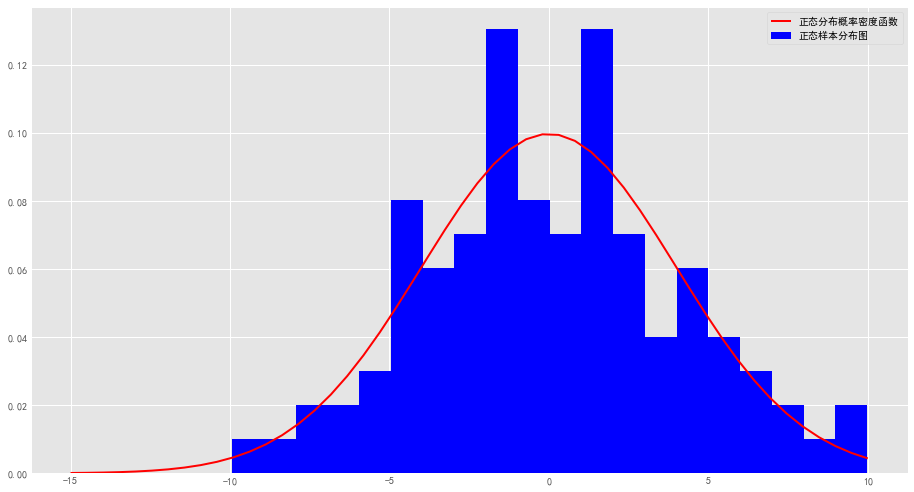

In [37]:
plt.figure(figsize = (14, 8))
plt.hist(x_norm, density = True, bins = 20, color = 'blue', label = '正态样本分布图')
x = np.linspace(-15, 10, 50)
plt.plot(x, norm.pdf(x, 0, 4), 'r-', linewidth = 2, label = '正态分布概率密度函数')
plt.legend(loc = 'best')

# 信号处理
## 序列线性趋势提取

In [39]:
from scipy import signal

x1 = np.linspace(1, 100, 100)
x2 = np.random.randn(100) * 0.2
x = x1 + x2
x_series = pd.Series(x, index = list(pd.date_range(start = '2017-01-01', end = '2017-04-10')))
x_series[:10]

2017-01-01    0.955732
2017-01-02    2.314015
2017-01-03    2.996536
2017-01-04    4.117395
2017-01-05    5.076922
2017-01-06    6.407262
2017-01-07    7.248626
2017-01-08    8.187181
2017-01-09    9.362628
2017-01-10    9.879389
dtype: float64

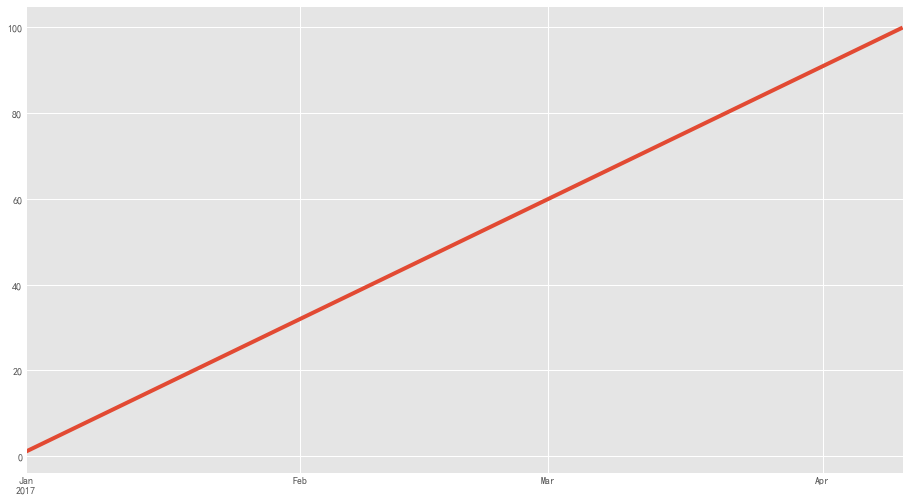

In [40]:
after_trend = signal.detrend(x_series, type = 'linear')
trend = pd.Series(x - after_trend, index = list(pd.date_range(start = '2017-01-01', end = '2017-04-10')))
plt.figure(figsize = (14, 8))
trend.plot()

## 傅里叶分析

In [41]:
from scipy import fftpack

spec = np.abs(fftpack.fftshift(fftpack.rfft(after_trend)))
spec

array([1.3258, 0.4267, 0.6144, 0.1064, 1.3291, 3.8601, 0.6399, 1.6601,
       0.1442, 0.8202, 1.6154, 1.4028, 1.5773, 0.3948, 0.2279, 1.1492,
       0.4389, 1.1762, 0.8465, 3.3114, 0.7106, 1.0906, 1.5169, 2.3795,
       0.3513, 2.0403, 1.9246, 1.9669, 2.3979, 0.1852, 0.382 , 0.3206,
       0.9665, 0.0626, 0.6757, 0.8523, 2.5393, 1.2219, 0.9984, 1.2078,
       0.0123, 2.4384, 0.0066, 0.2533, 1.8989, 0.9184, 0.5741, 0.0087,
       1.1059, 1.4141, 0.    , 0.76  , 0.1683, 1.1426, 1.2346, 1.9652,
       0.0857, 2.3867, 2.3823, 2.4599, 0.1026, 1.3517, 0.1484, 1.9695,
       1.018 , 0.7719, 2.3703, 0.4101, 2.0669, 2.5216, 1.6805, 0.5397,
       1.4993, 2.9352, 2.6178, 1.8116, 0.5733, 1.8503, 2.2389, 1.6068,
       0.6462, 0.6946, 2.0967, 0.5128, 1.3865, 1.2279, 0.4779, 0.2751,
       0.8042, 0.1851, 0.2455, 0.0361, 0.4592, 0.1537, 1.638 , 0.6728,
       1.2928, 0.7678, 3.8348, 1.1177])

In [42]:
spec[spec < 0.1*spec.max()] = 0
spec

array([1.3258, 0.4267, 0.6144, 0.    , 1.3291, 3.8601, 0.6399, 1.6601,
       0.    , 0.8202, 1.6154, 1.4028, 1.5773, 0.3948, 0.    , 1.1492,
       0.4389, 1.1762, 0.8465, 3.3114, 0.7106, 1.0906, 1.5169, 2.3795,
       0.    , 2.0403, 1.9246, 1.9669, 2.3979, 0.    , 0.    , 0.    ,
       0.9665, 0.    , 0.6757, 0.8523, 2.5393, 1.2219, 0.9984, 1.2078,
       0.    , 2.4384, 0.    , 0.    , 1.8989, 0.9184, 0.5741, 0.    ,
       1.1059, 1.4141, 0.    , 0.76  , 0.    , 1.1426, 1.2346, 1.9652,
       0.    , 2.3867, 2.3823, 2.4599, 0.    , 1.3517, 0.    , 1.9695,
       1.018 , 0.7719, 2.3703, 0.4101, 2.0669, 2.5216, 1.6805, 0.5397,
       1.4993, 2.9352, 2.6178, 1.8116, 0.5733, 1.8503, 2.2389, 1.6068,
       0.6462, 0.6946, 2.0967, 0.5128, 1.3865, 1.2279, 0.4779, 0.    ,
       0.8042, 0.    , 0.    , 0.    , 0.4592, 0.    , 1.638 , 0.6728,
       1.2928, 0.7678, 3.8348, 1.1177])

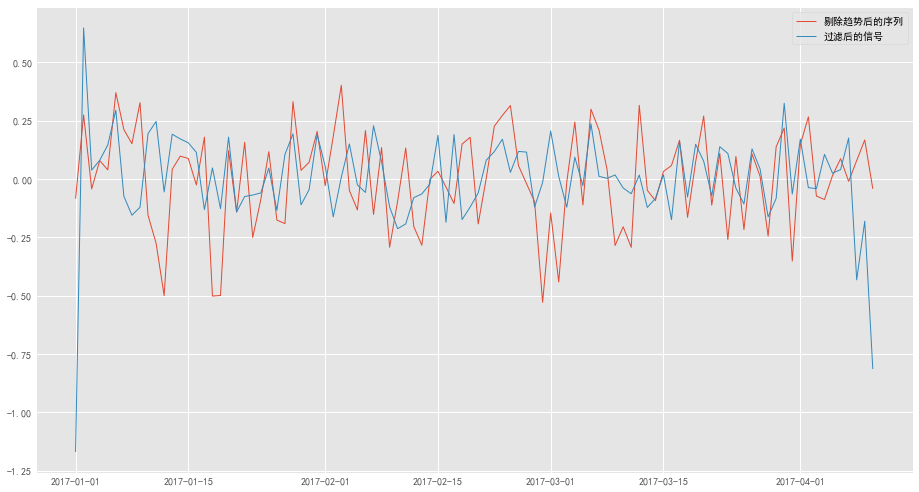

In [53]:
time = pd.date_range(start = '2017-01-01', end = '2017-04-10')
plt.figure(figsize = (14, 8))
plt.plot(time, after_trend, label = '剔除趋势后的序列', linewidth = 1)
plt.plot(time, -fftpack.irfft(fftpack.ifftshift(spec)), label = '过滤后的信号', linewidth = 1)
plt.legend(loc = 'best')